In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
import pandas as pd

In [2]:
dataset = pd.read_csv('marine_life_dataset.csv')

dataset.head()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels
0,Western Reef,Fish,33,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Southern Reef,Crab,15,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Eastern Reef,Jellyfish,8,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  1000 non-null   object 
 1   Species                 1000 non-null   object 
 2   Population              1000 non-null   int64  
 3   Species Category        1000 non-null   object 
 4   Behavior                1000 non-null   object 
 5   Habitat Preference      1000 non-null   object 
 6   Trophic Level           1000 non-null   object 
 7   Water Temperature (°C)  1000 non-null   float64
 8   Nutrient Levels         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [5]:
dataset.describe()

,Population,Water Temperature (°C),Nutrient Levels
count,1000.000000,1000.000000,1000.000000
mean,49.809000,24.980282,0.507339
std,28.396529,2.905684,0.227108
min,1.000000,20.017426,0.100145
25%,26.000000,22.482619,0.313938
50%,50.000000,24.785344,0.505267
75%,74.000000,27.505758,0.708002
max,99.000000,29.992590,0.899894


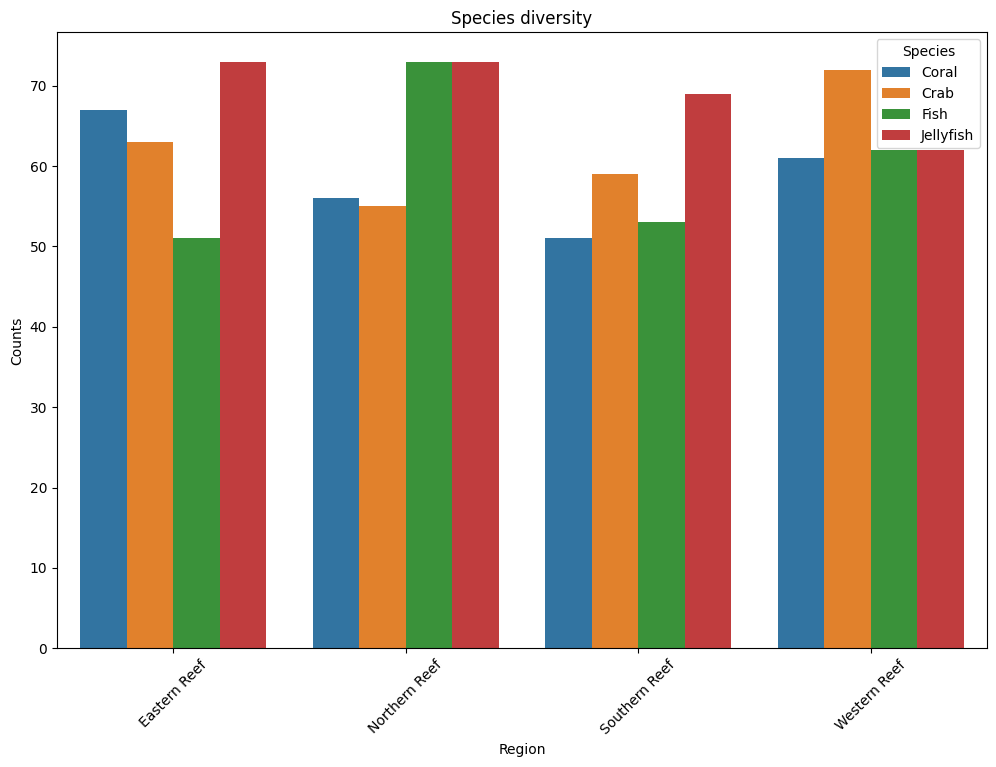

In [23]:
spec_div = dataset.groupby(['Region','Species']).size().reset_index(name='Counts')

plt.figure(figsize=(12,8))
sns.barplot(data = spec_div, x='Region',y='Counts',hue='Species')
plt.title("Species diversity")
plt.legend(title='Species')
plt.xticks(rotation=45)
plt.show()

<Axes: >

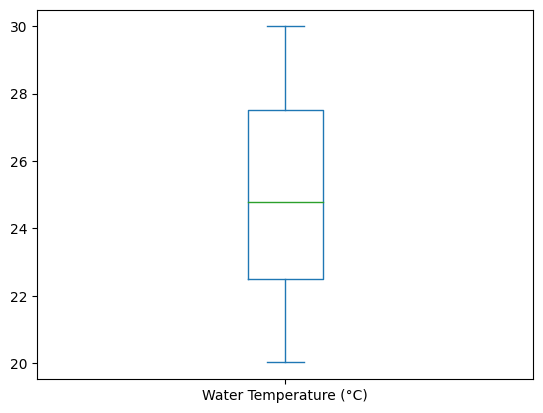

In [28]:
dataset['Water Temperature (°C)'].plot.box()

<Axes: >

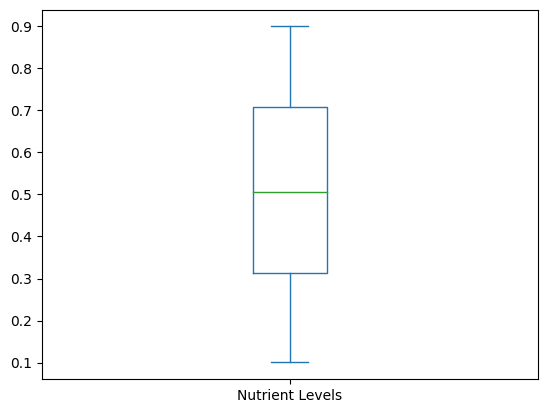

In [29]:
dataset['Nutrient Levels'].plot.box()

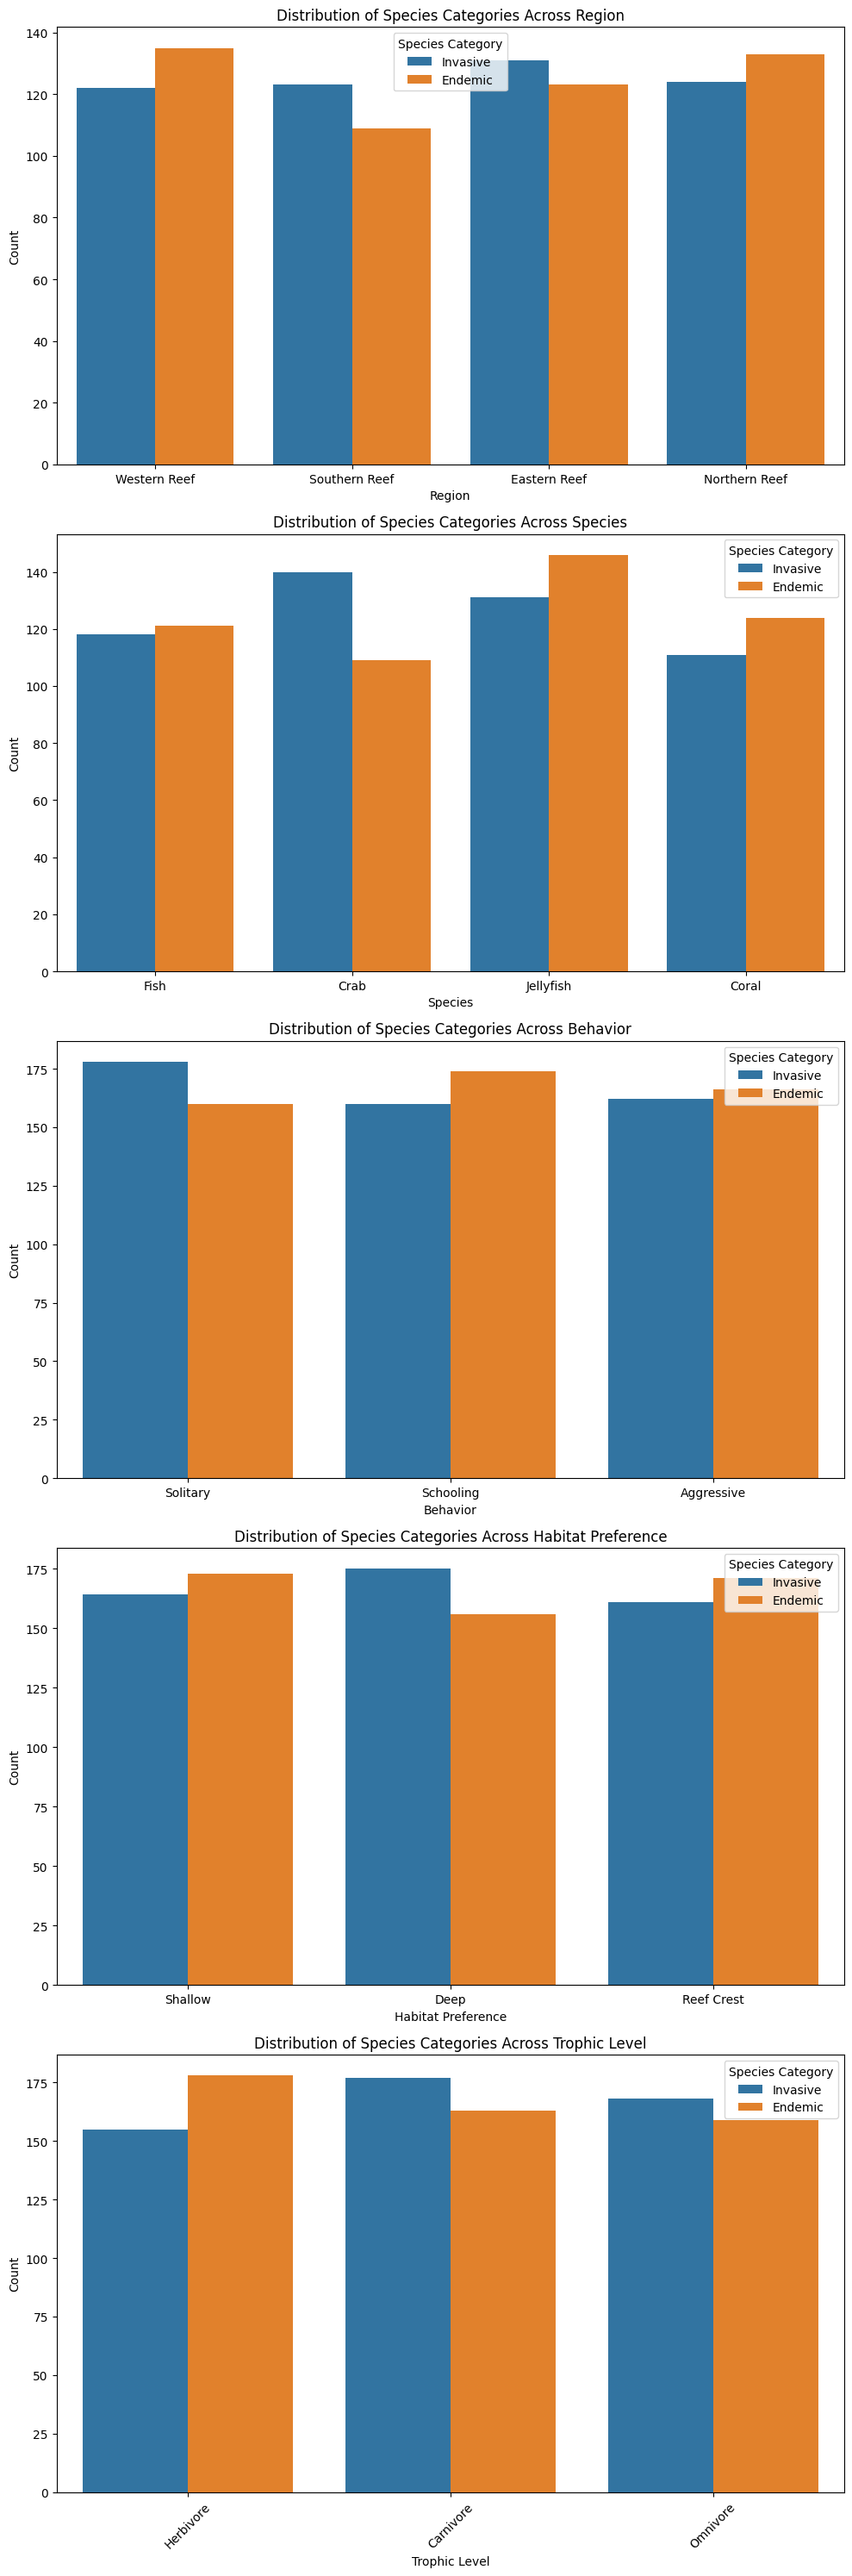

In [39]:
variables = ['Region','Species','Behavior','Habitat Preference', 'Trophic Level']

n_vars = len(variables)

fig, axes = plt.subplots(n_vars, 1, figsize=(10, 6*n_vars))

for i, vars in enumerate(variables):
    ax = axes[i]
    sns.countplot(data=dataset, x=vars, hue='Species Category', ax=ax)
    ax.set_title(f'Distribution of Species Categories Across {vars}')
    ax.set_xlabel(vars)
    ax.set_ylabel('Count')
    ax.legend(title='Species Category')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

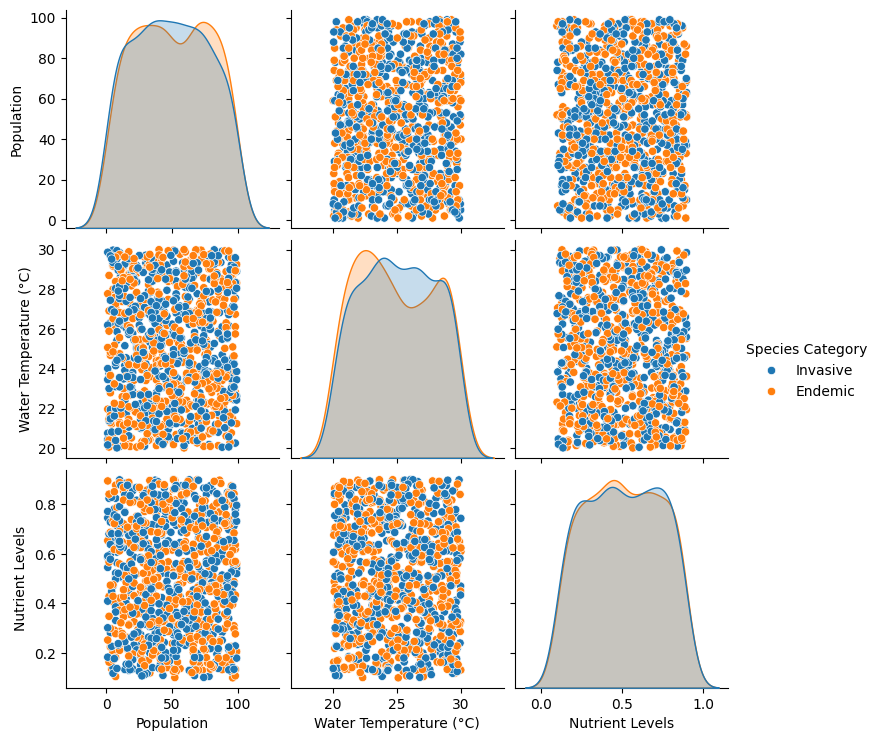

In [12]:
sns.pairplot(dataset, hue='Species Category', vars=['Population', 'Water Temperature (°C)', 'Nutrient Levels'])

plt.show()

In [ ]:
trophic_map = {
    'Herbivore': -1,
    'Omnivore': 0,
    'Carnivore': 1
}

cat_map = {
    
}

dataset['Trophic Level'] = dataset['Trophic Level'].map(trophic_map)